## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'

# 5. 데이터 분석
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>

# 5.0. [데이터 분석을 위한 준비과정] 데이터 합치기

#### [5.0.1] 데이터 합치기
* 지금까지 1~4에서 준비한 데이터 파일
    * 버스 정류장 데이터 - df_seoul_bus_station.csv
    * 유동인구 데이터 - df_seoul_moving.csv
    * 구별 등록 인구 데이터 - df_seoul_people.csv
    * 구별 상권 데이터 - df_seoul_business.csv
* 아래 제시되는 'standard' 데이터 프레임을 기준으로 활용하여, 지금까지 1~4에서 준비한 데이터를 각각 불러와서 합쳐 주세요.
* 이후에는 이 합쳐진 데이터 프레임을 기반으로 미션을 수행하기 위한 분석을 진행합니다.

In [14]:
import pandas as pd

In [15]:
# 데이터 합치기 진행 시, 아래 제시되는 정보를 활용하세요.
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [16]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [17]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# '5. 데이터 분석'은 자세한 가이드가 제공되지 않으니, 각자의 방법으로 진행해주세요.
import pandas as pd
import numpy as np
df1 = pd.read_csv('./csv/df_seoul_bus_station.csv')

In [18]:
df1.head()

,자치구,정류장개수,노선개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [19]:
df2 = pd.read_csv('csv/df_seoul_moving.csv')
df2.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99


In [20]:
df3 = pd.read_csv('csv/df_seoul_people.csv')
df3.head()

,자치구,계,남자,여자,세대당인구,65세이상고령자
0,합계,9732617,4716704,5015913,2.14,1628980
1,종로구,153684,74018,79666,1.96,28064
2,중구,131450,63869,67581,1.92,24742
3,용산구,236518,114571,121947,2.00,39461
4,성동구,291609,141662,149947,2.12,46896


In [21]:
df4 = pd.read_csv('csv/df_seoul_business.csv')
df4.head()

,자치구,동,한식일반음식점업 종사자수,커피전문점 종사자수,기타주점업 종사자수,일반교과학원 종사자수,한식육류요리전문점 종사자수
0,종로구,소계,"5,912","3,613","1,413",382,"1,982"
1,중구,소계,"6,414","3,542",982,175,"2,121"
2,용산구,소계,"2,987","2,076","1,332",573,"1,184"
3,성동구,소계,"2,785","1,859",621,"1,494","1,545"
4,광진구,소계,"2,861","1,887","1,577","1,646","1,678"


In [22]:
df5 = pd.merge(pd.merge(df1, df3), df4)
df6 = pd.merge(df2, standard)
df = pd.merge(df5, df6)

In [23]:
df.head()

,자치구,정류장개수,노선개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,계,남자,여자,...,한식일반음식점업 종사자수,커피전문점 종사자수,기타주점업 종사자수,일반교과학원 종사자수,한식육류요리전문점 종사자수,도착 시군구 코드,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,537338,257096,280242,...,"11,486","7,273","2,528","9,020","5,008",11230,23.094565,90.226636,11437560,44684651.43
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,227891,237206,...,"3,388","1,660","1,349","2,104","1,459",11250,25.670084,64.249687,8430800,21101460.33
2,강북구,413,67,4825181,4671783,133.020373,128.791504,300824,145934,154890,...,"2,663","1,095","1,275",740,"1,176",11090,23.811274,39.128470,7649610,12570412.30
3,강서구,566,49,4681083,4652828,88.119480,87.587591,578426,277797,300629,...,"4,584","2,530","1,709","2,347","2,274",11160,25.124068,58.447282,9388010,21839762.06
4,관악구,466,86,7655819,7792476,154.753674,157.516040,500336,250450,249886,...,"3,689","2,049","1,672","1,230","1,628",11210,23.377928,49.904036,8772170,18725641.04


In [25]:
%pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.1 MB 5.0 MB/s eta 0:00:09
   ---------------------------------------- 0.5/44.1 MB 6.6 MB/s eta 0:00:07
    --------------------------------------- 0.9/44.1 MB 7.5 MB/s eta 0:00:06
   - -------------------------------------- 1.4/44.1 MB 8.2 MB/s eta 0:00:06
   - -------------------------------------- 1.6/44.1 MB 7.3 MB/s eta 0:00:06
   - -------------------------------------- 2.1/44.1 MB 7.8 MB/s eta 0:00:06
   -- -------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [27]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,10))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()
    
    
def g(var,target,data):
    plt.figure(figsize=(4,12))

    plt.subplot(3,1,1)
    sns.scatterplot(x=var, y = target, data = data)
    plt.subplot(3,1,2)
    sns.regplot(x=var, y = target, data = data)

    sns.jointplot(x=var, y = target, data = data)

    plt.show()

def n(var,target,data):
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

def ng(var,target,data):
    n(var,target,data)
    g(var,target,data)

In [29]:
df = pd.read_csv('csv/df.csv')
df['사업체수'] = df[['한식 일반 음식점업 사업체수', '부동산 중개 및 대리업 사업체수', '두발미용업 사업체수', '커피전문점 사업체수', '기타주점업 사업체수','일반 교과 학원 사업체수', '한식 육류요리 전문점 사업체수']].sum(axis=1)
# 택시랑 운송업은 제외함
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)의 평균,이동인구(합)의 평균,...,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 사업체수,기타주점업 종사자수,일반 교과 학원 사업체수,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수,사업체수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,...,3613,400,962,537,1413,110,382,437,1982,4390
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,...,3542,10810,24248,381,982,57,175,443,2121,4253
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,2076,54,317,487,1332,104,573,300,1184,3539
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,...,1859,149,1572,285,621,258,1494,400,1545,3736
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,...,1887,89,687,633,1577,413,1646,467,1678,4683
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,...,1472,211,976,499,1082,302,984,442,1509,4426
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,...,1037,63,284,535,1000,288,1045,499,1504,4222
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.160283,45.816273,...,1384,85,454,512,1030,464,1755,365,1334,4356
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.128470,...,1095,40,94,580,1275,220,740,362,1176,3747
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,...,837,22,43,258,477,351,1162,302,943,2986


In [31]:
df = pd.merge(df, pd.read_csv('csv/seoul_population.csv'))
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)의 평균,이동인구(합)의 평균,...,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수,사업체수,Unnamed: 0,인구밀도,인구밀도 대비 정류장 비율,유효면적,인구수,유효면적 인구밀도
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,...,382,437,1982,4390,0,6366,5.482249,23.972507,153684,6410.843889
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,...,175,443,2121,4253,1,13131,1.355571,9.974292,131450,13178.880265
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,573,300,1184,3539,2,10667,3.028030,21.898766,236518,10800.517253
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,...,1494,400,1545,3736,3,17096,2.544455,16.804426,291609,17353.106854
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,...,1646,467,1678,4683,4,20589,1.306523,17.075115,353110,20679.802157
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,...,984,442,1509,4426,5,24866,1.230596,14.245433,352592,24751.230798
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,...,1045,499,1504,4222,6,21089,1.801887,18.531520,393600,21239.488180
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.160283,45.816273,...,1755,365,1334,4356,7,17981,3.347978,24.621432,442680,17979.457897
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.128470,...,740,362,1176,3747,8,12614,3.274140,23.636019,300824,12727.354805
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,...,1162,302,943,2986,9,15205,2.361065,20.679052,318100,15382.716771


<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
65세이상고령자,25.0,65159.2,19280.183408,24742.0,55012.0,65122.0,75719.0,99854.0


<< 그래프 >>


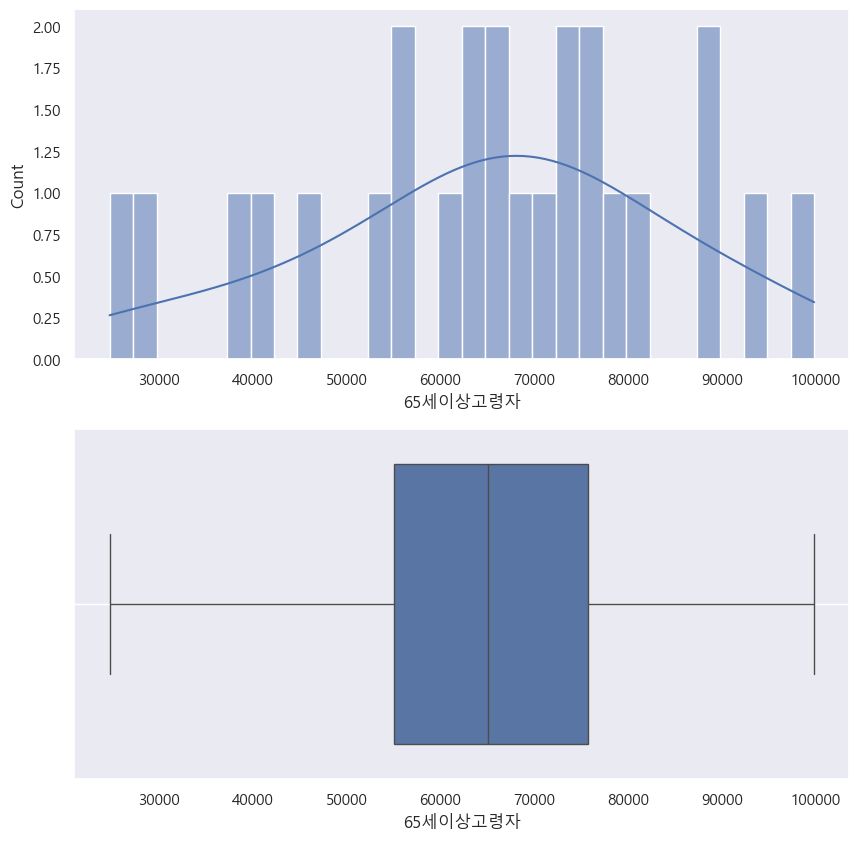

In [49]:
eda_1_num(df, '65세이상고령자', bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
사업체수,25.0,4957.28,1637.902457,2986.0,3962.0,4415.0,5372.0,10583.0


<< 그래프 >>


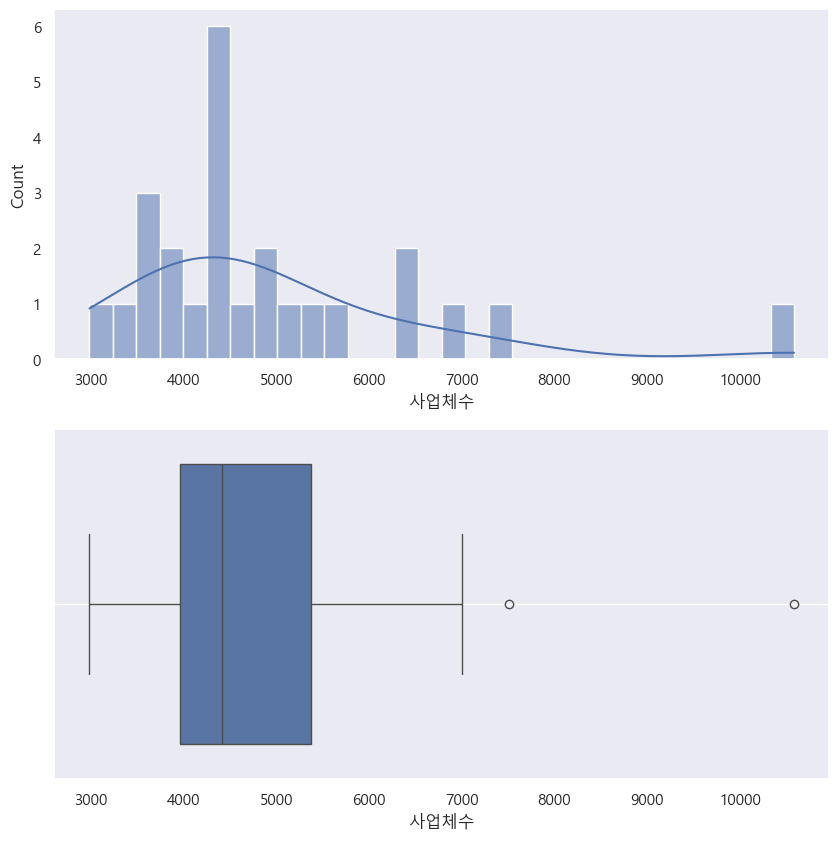

In [32]:
eda_1_num(df, '사업체수', bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
택시운송업 종사자수,25.0,3068.04,1963.159772,215.0,1838.0,2589.0,4850.0,6922.0


<< 그래프 >>


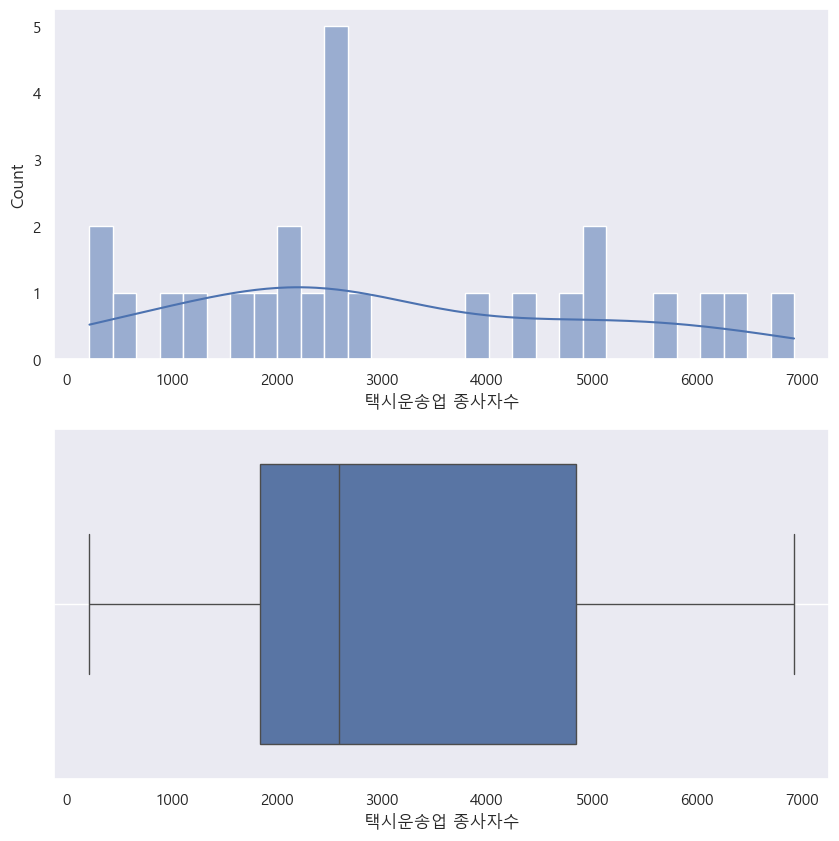

In [47]:
eda_1_num(df, '택시운송업 종사자수', bins = 30)

In [33]:
df['사업체수/인구밀도'] = df['사업체수']/df['인구밀도']
df['사업체수/유효면적인구밀도'] = df['사업체수']/df['유효면적 인구밀도']
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)의 평균,이동인구(합)의 평균,...,한식 육류요리 전문점 종사자수,사업체수,Unnamed: 0,인구밀도,인구밀도 대비 정류장 비율,유효면적,인구수,유효면적 인구밀도,사업체수/인구밀도,사업체수/유효면적인구밀도
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,...,1982,4390,0,6366,5.482249,23.972507,153684,6410.843889,0.689601,0.684777
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,...,2121,4253,1,13131,1.355571,9.974292,131450,13178.880265,0.323890,0.322713
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,1184,3539,2,10667,3.028030,21.898766,236518,10800.517253,0.331771,0.327669
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,...,1545,3736,3,17096,2.544455,16.804426,291609,17353.106854,0.218531,0.215293
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,...,1678,4683,4,20589,1.306523,17.075115,353110,20679.802157,0.227452,0.226453
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,...,1509,4426,5,24866,1.230596,14.245433,352592,24751.230798,0.177994,0.178819
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,...,1504,4222,6,21089,1.801887,18.531520,393600,21239.488180,0.200199,0.198781
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.160283,45.816273,...,1334,4356,7,17981,3.347978,24.621432,442680,17979.457897,0.242256,0.242276
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.128470,...,1176,3747,8,12614,3.274140,23.636019,300824,12727.354805,0.297051,0.294405
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,...,943,2986,9,15205,2.361065,20.679052,318100,15382.716771,0.196383,0.194114


<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
사업체수/인구밀도,25.0,0.328627,0.174083,0.166017,0.202306,0.297051,0.348628,0.78265


<< 그래프 >>


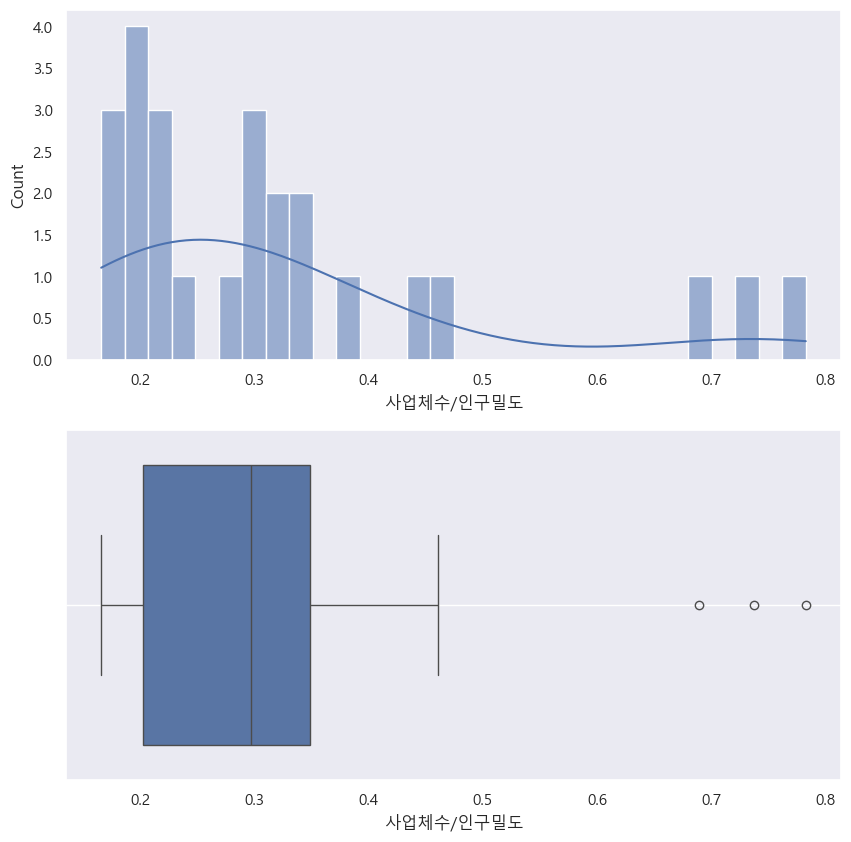

In [34]:
eda_1_num(df, '사업체수/인구밀도', bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
사업체수/유효면적인구밀도,25.0,0.326354,0.172266,0.164523,0.20454,0.294405,0.343987,0.777908


<< 그래프 >>


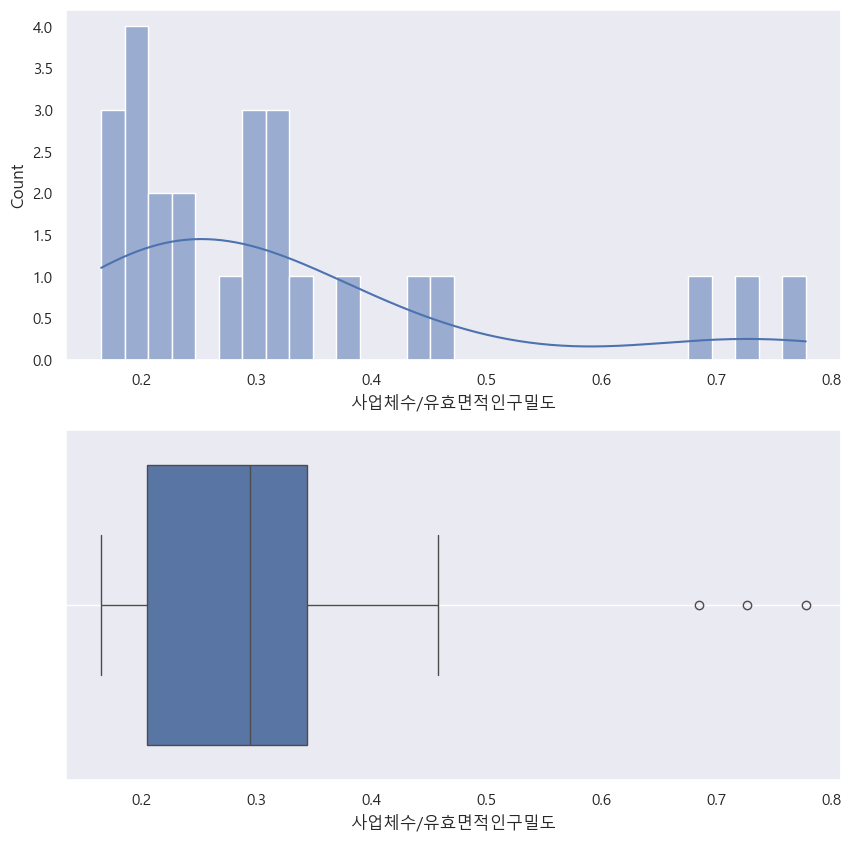

In [35]:
eda_1_num(df, '사업체수/유효면적인구밀도', bins = 30)

,자치구,인구밀도
0,종로구,6366
1,중구,13131
2,용산구,10667
3,성동구,17096
4,광진구,20589
5,동대문구,24866
6,중랑구,21089
7,성북구,17981
8,강북구,12614
9,도봉구,15205


<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
유효면적,25.0,24.223932,9.305893,9.974292,17.469613,23.636019,29.563482,46.899887


<< 그래프 >>


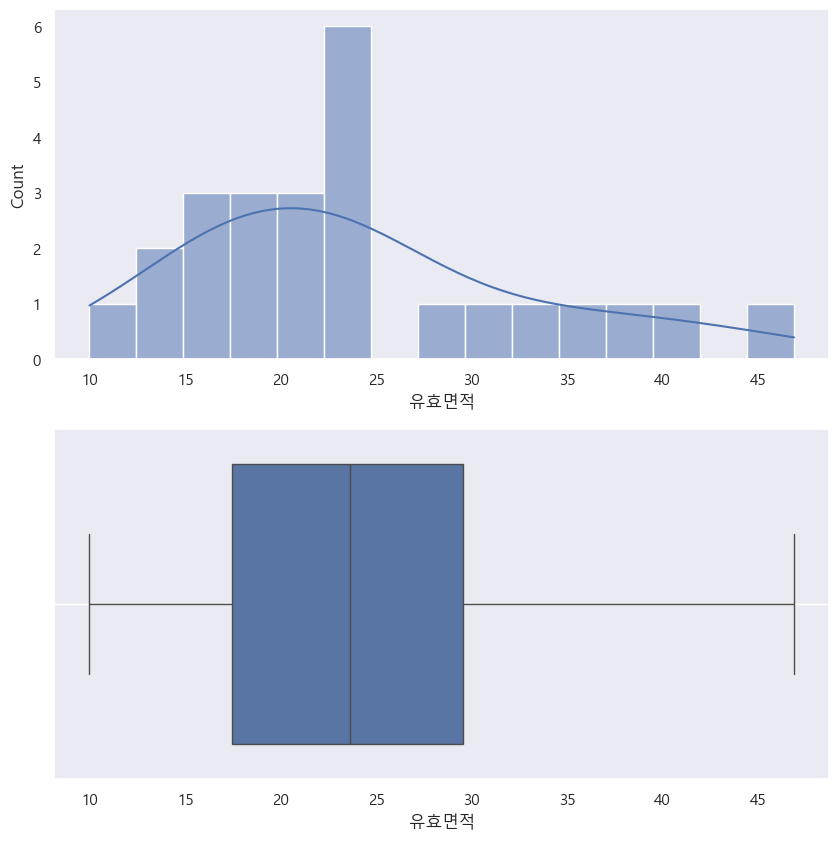

In [45]:
eda_1_num(df, '유효면적', bins = 15)

상관계수 : 0.39731494556919134, p-value : 0.04921918681749973


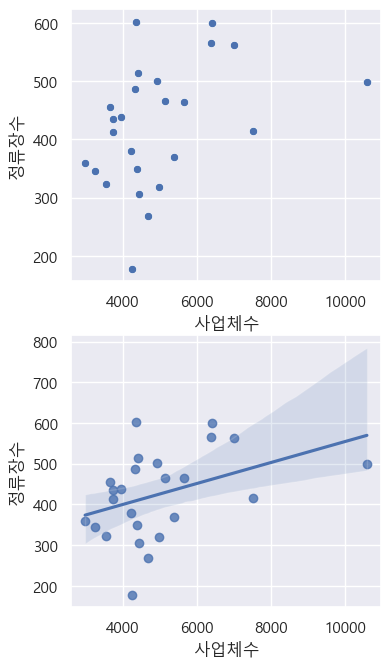

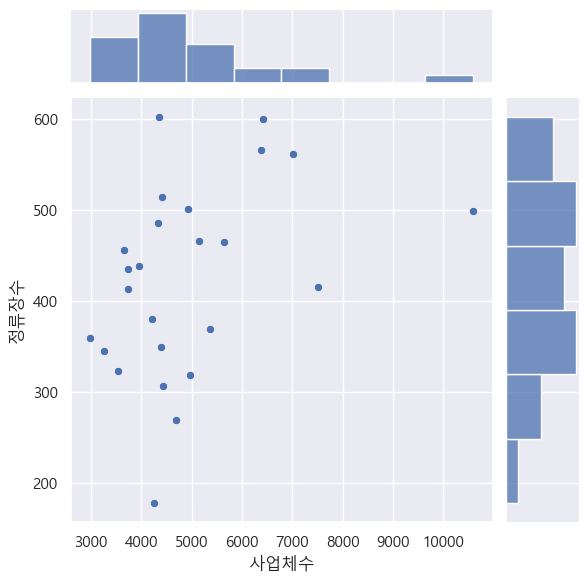

In [36]:
ng('사업체수', '정류장수', df)

상관계수 : 0.35355999362095397, p-value : 0.08295372900701622


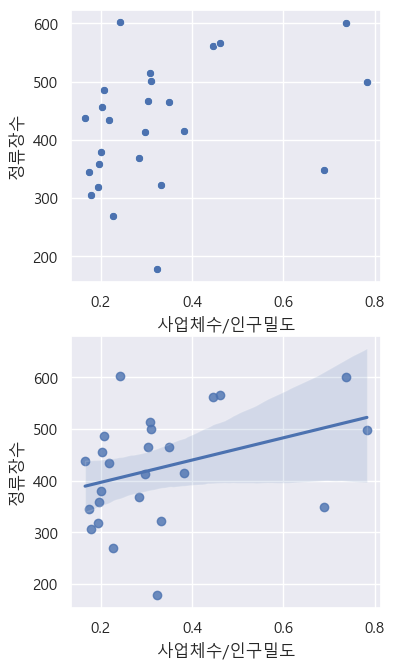

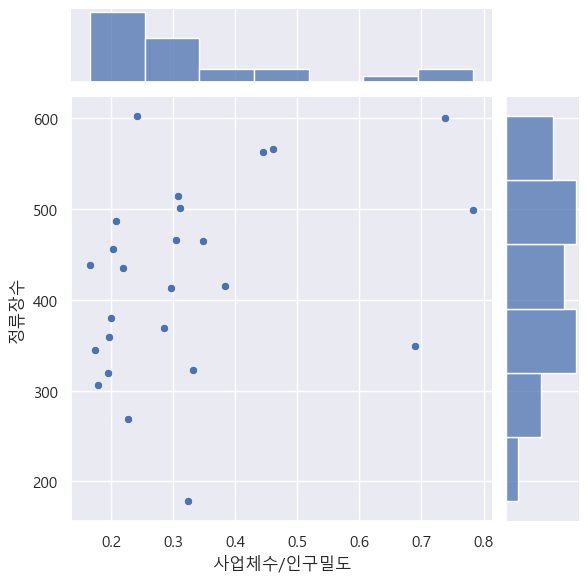

In [37]:
ng('사업체수/인구밀도', '정류장수', df)

상관계수 : 0.35303683318403517, p-value : 0.0834420930816978


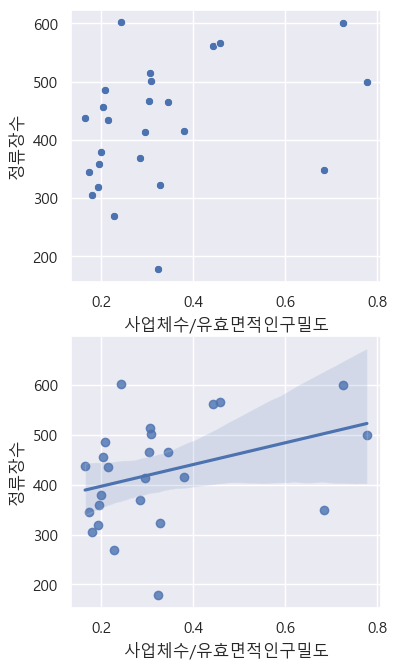

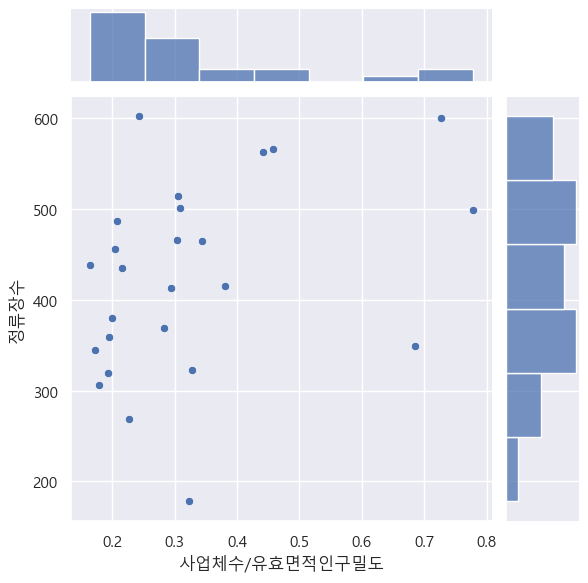

In [38]:
ng('사업체수/유효면적인구밀도', '정류장수', df)

상관계수 : 0.7018087241800407, p-value : 9.243767587390472e-05


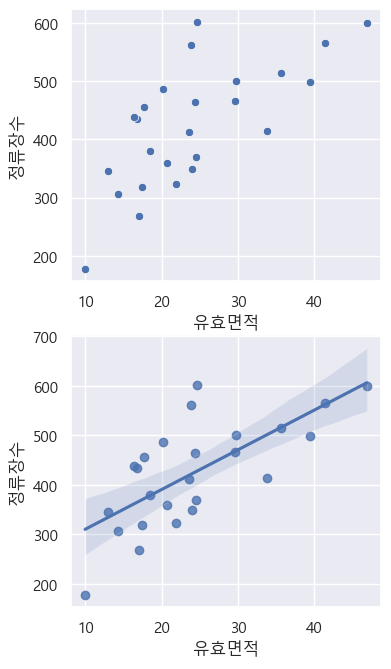

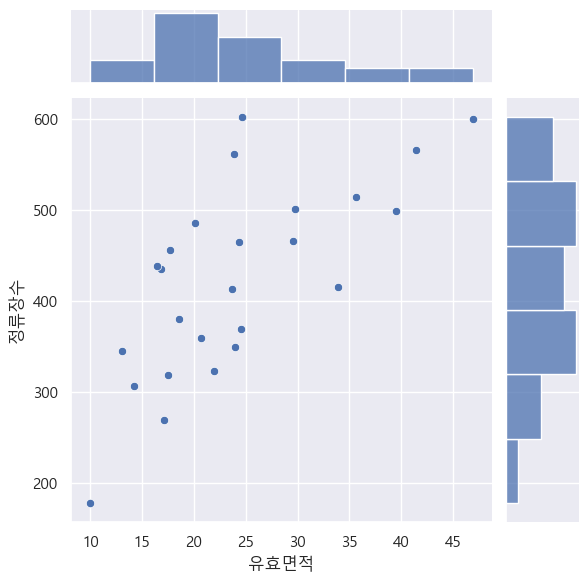

In [46]:
ng('유효면적', '정류장수', df)

상관계수 : 0.2156696355767232, p-value : 0.30048703483874195


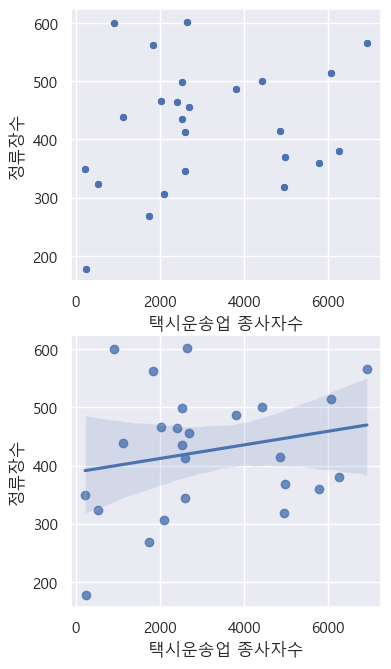

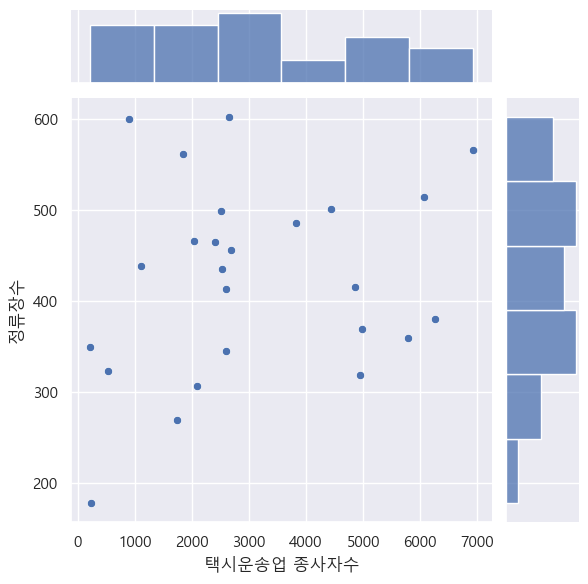

In [48]:
ng('택시운송업 종사자수', '정류장수', df)

In [39]:
df['정류장수포화도'] = df['정류장수']/df['사업체수/유효면적인구밀도']
# 정류장수/(사업체수/유효면적인구밀도)

df_temp = df.iloc[:, [1, 2, 53, 54]].sort_values(by='정류장수포화도')
df_temp

,자치구,정류장수,사업체수/유효면적인구밀도,정류장수포화도
0,종로구,349,0.684777,509.654788
1,중구,178,0.322713,551.573169
22,강남구,499,0.777908,641.463940
21,서초구,600,0.726949,825.367408
2,용산구,323,0.327669,985.749385
23,송파구,415,0.380353,1091.092791
4,광진구,269,0.226453,1187.885283
15,강서구,566,0.457902,1236.072576
13,마포구,562,0.442056,1271.333071
24,강동구,369,0.283631,1300.986187


In [40]:
dd = df_temp.loc[:, '자치구']
dd

0      종로구
1       중구
22     강남구
21     서초구
2      용산구
23     송파구
4      광진구
15     강서구
13     마포구
24     강동구
18    영등포구
8      강북구
20     관악구
11     은평구
14     양천구
10     노원구
5     동대문구
9      도봉구
6      중랑구
17     금천구
3      성동구
12    서대문구
16     구로구
7      성북구
19     동작구
Name: 자치구, dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   도착 시군구 코드             25 non-null     int64  
 1   자치구                   25 non-null     object 
 2   정류장수                  25 non-null     int64  
 3   노선수                   25 non-null     int64  
 4   승차총승객수                25 non-null     int64  
 5   하차총승객수                25 non-null     int64  
 6   승차평균승객수               25 non-null     float64
 7   하차평균승객수               25 non-null     float64
 8   평균 이동 시간(분)의 평균       25 non-null     float64
 9   이동인구(합)의 평균           25 non-null     float64
 10  평균 이동 시간(분)의 합        25 non-null     int64  
 11  이동인구(합)의 합            25 non-null     float64
 12  기간                    25 non-null     object 
 13  세대                    25 non-null     int64  
 14  계                     25 non-null     int64  
 15  남자                    25 

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,114571,121947,236518,36,2987,2076,1332
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,8887140,17449273.95,141662,149947,291609,53,2785,1859,621
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,169525,183585,353110,71,2861,1887,1577


C:\Users\User\AppData\Local\Temp\ipykernel_17540\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.533514,0.610548,0.235541,0.473119,0.697314,0.675779,0.687074,0.999351,0.308156,0.267956,0.318339
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374723,0.356947,0.355635,0.550032,0.580536,0.566615,0.433391,0.146445,0.209808,0.315121
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,0.226437,-0.294351,-0.268906,-0.281536,-0.085764,0.413556,0.425180,0.262016
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,0.576553,0.359532,0.368034,0.364433,0.426003,0.574076,0.530386,0.493852
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,0.558699,0.384499,0.390470,0.388119,0.426352,0.538578,0.494266,0.485755
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.382202,-0.079733,0.140483,0.067920,-0.255715,-0.282278,-0.269854,0.015474,0.257629,0.204745,0.220043
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.356171,-0.072466,0.148381,0.062384,-0.192074,-0.221558,-0.207643,0.026276,0.212645,0.160374,0.227213
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,1.000000,0.373091,-0.141914,0.095727,0.644669,0.631852,0.638885,0.544275,-0.128780,-0.181316,-0.034993
이동인구평균,0.610548,0.374723,-0.003649,0.474049,0.463898,-0.079733,-0.072466,0.373091,1.000000,0.808313,0.951399,0.681313,0.708455,0.696328,0.617066,0.745931,0.736411,0.615303
총 이동시간,0.235541,0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,-0.141914,0.808313,1.000000,0.923298,0.350985,0.393565,0.373570,0.236683,0.816341,0.835772,0.655550


# 5.1.가설 수립

## 5.1.1.가설 수립 
+ 어떤 데이터를 label 데이터(y)로 해야 할 지 생각해보아 정하세요.
    * 설정한 가설에 따라(가설 마다) y는 다를 수 있습니다. 개인/조 마다 y는 다를 수 있습니다.
+ 가설의 개수는 제한이 없습니다. (조 별로 적어도 3개 이상 설정하세요.)
+ 가설 예시
    * 가설 1 정류장 수와 승차 총 승객수
        * H0 : 정류장 수와 승차 총 승객수는 연관이 없다
        * H1 : 정류장 수와 승차 총 승객수는 연관이 있다
    * 가설 2 노선 수와 총 이동시간
        * H0 : 노선 수와 총 이동시간은 연관이 없다
        * H1 : 노선 수와 총 이동시간은 연관이 있다
    * 가설 3 정류장 수와 이동인구(합)
    * 가설 4 노선 수와 평균 이동 시간
    * 가설 5 노선 수와 커피전문점 이용자수

In [1]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# 

## 5.1.2.단변량 분석

* 아래 제시되는 내용들을 참고하여 단변량 분석을 진행합니다. 
    * 변수의 비즈니스 의미  
    * 변수가 숫자형인지 범주형인지 판단하여 진행
    * 전처리가 필요한지 확인하고 필요 시 진행: NaN 존재 여부 및 조치 방안, 가변수화 대상여부  
    * 기초통계량 분석
    * 데이터 분포 분석  
    * 위 정보로부터 파악한 내용을 비즈니스 관점에서 정리  
    * 추가 분석해볼 사항 도출하여 추가 분석 진행
* 이 프로젝트에서 비즈니스 관점이라 함은 데이터를 분석하는 목적이 어디에 있는가 하는 것을 고려하자는 것입니다.
    * 즉, "서울시 내 어느 자치구에 버스노선 추가가 필요한지를 분석하여 합리적으로 결정하려는 목적"을 가지고 데이터에 근거하기 위해 데이터를 분석하고 정리해야 한다는 의미입니다.

In [42]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


### 2)

### 3)

## 5.1.3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 시각화와 수치화(가설검정)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1
* p-value 기준 판단 기준
    * P-value < 0.05이면, 두 변수 간에 관계가 있다. (상관계수가 의미가 있다.)
    * P-value >= 0.05이면, 두 변수 간에 관계가 없다. (상관계수가 의미가 없다.)

In [98]:
import scipy.stats as spst

# 아래에 코드를 작성하고 결과를 확인합니다.


상관계수 : 0.5666813370974585, p-value : 0.003141977397117322


PearsonRResult(statistic=0.38833248798056735, pvalue=0.05507091940045923)

PearsonRResult(statistic=0.42518048108643286, pvalue=0.03410811239601253)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,172318,180274,352592,87,3566,1472,1082,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,250450,249886,500336,340,3689,2049,1672,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413,0.638150


,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,...,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1,비율2
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,...,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382,125.120308
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,21101460.33,227891,237206,465097,432,3388,1660,1349,1.276793,126.506024
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,...,34837613.05,321963,346298,668261,404,5760,3372,1469,0.735588,163.107948
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,...,21839762.06,277797,300629,578426,257,4584,2530,1709,1.209122,193.675889
13,11140,마포구,562,97,5088461,4957596,103.907639,101.235343,22.044201,54.884906,...,23639807.30,176886,201743,378629,221,4705,4475,2559,1.104460,216.759777


## 5.1.4.관계 정리

### 1) 강한 관계의 변수

In [103]:
# 강한 관계의 변수는 무엇인가요?
# 예) 정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

In [104]:
# 중간 관계의 변수는 무엇인가요?
# 예) 노선수 - 커피전문점.1(종사자수)

## 5.1.5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇인가요?

In [105]:
# 솔루션 도출
# 예) 강남구 - 중구 - 동대문구 - 관악구에 필요합니다